
## Programming for Data Science

### Lecture 13: Regression in Machine Learning

### Instructor: Farhad Pourkamali 


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/ProgrammingForDataScience/blob/main/Lecture13_Regression.ipynb)


### Introduction
<hr style="border:2px solid gray">

* Linear regression: Problem formulation, assumption, loss function, gradient
* Normal equation
* Sklearn implementation
* Evaluation metrics
* Nonlinear extension 


### Case study: univariate linear regression

<hr style="border:2px solid gray">
   
* Training data: $\mathcal{D}=\{(x_n,y_n)\}_{n=1}^N$

* Parametric model: $f(x)=\theta_0+\theta_1 x$

* Objective: Choose $\theta_0,\theta_1$ such that $f(x_n)$ is close to $y_n$ 

* Mean squared error (MSE): 

$$\mathcal{L}(\theta_0, \theta_1)=\frac{1}{N}\sum_{n=1}^N \big(y_n - f(x_n)\big)^2$$

### Solving the optimization problem

<hr style="border:2px solid gray">

* We'll need the concept of partial derivatives

* To compute $\partial \mathcal{L}/\partial \theta_0$, take the  derivative with respect to $\theta_0$, treating the rest of the arguments as constants

* We can show that 

$$\frac{\partial \mathcal{L}}{\partial \theta_0}=\frac{-2}{N}\sum_{n=1}^N\big(y_n-\theta_0-\theta_1x_n\big)=\frac{2}{N}\sum_{n=1}^N\big(f(x_n)- y_n\big)$$

$$\frac{\partial \mathcal{L}}{\partial \theta_1}=\frac{-2}{N}\sum_{n=1}^N\big(y_n-\theta_0-\theta_1x_n\big)x_n=\frac{2}{N}\sum_{n=1}^N\big(f(x_n)- y_n\big)x_n$$

### Gradient 
<hr style="border:2px solid gray">


* Extend the notion of derivatives to handle vector-argument functions
    + Given $\mathcal{L}:\mathbb{R}^d\mapsto \mathbb{R}$, where $d$ is the number of input variables
    
    $$\nabla \mathcal{L}=\begin{bmatrix}\frac{\partial \mathcal{L}}{\partial \theta_0}\\ \vdots\\ \frac{\partial \mathcal{L}}{\partial \theta_{d-1}} \end{bmatrix}\in\mathbb{R}^d$$
    
* Example from the previous slide ($d=2$): 

$$\nabla \mathcal{L}=\frac{2}{N}\begin{bmatrix}\sum_{n=1}^N\big(f(x_n) - y_n\big)\\ \sum_{n=1}^N\big(f(x_n) - y_n\big)x_n \end{bmatrix}\in\mathbb{R}^2$$

### Compact form of gradient, part 1
<hr style="border:2px solid gray">

* Let us define  
    * We represent a dataset as a matrix where each row is an observation (or data point) and each column is a feature (or variable). 

$$\mathbf{X}=\begin{bmatrix} 1 & x_1\\ \vdots & \vdots \\ 1 & x_N \end{bmatrix}\in\mathbb{R}^{N\times 2}, \boldsymbol{\theta}=\begin{bmatrix}\theta_0 \\ \theta_1\end{bmatrix}\in\mathbb{R}^{2}, \mathbf{y}=\begin{bmatrix}y_1 \\ \vdots \\ y_N\end{bmatrix}\in\mathbb{R}^{N}$$

* Hence, we get 

$$\mathbf{X}\boldsymbol{\theta} - \mathbf{y}=\begin{bmatrix}f(x_1) - y_1 \\ \vdots \\ f(x_N) - y_N\end{bmatrix}$$


### Compact form of gradient, part 2
<hr style="border:2px solid gray">

* The last step is to show that $\nabla \mathcal{L}$ can be written as 

$$\frac{2}{N}\mathbf{X}^T\big(\mathbf{X}\boldsymbol{\theta} - \mathbf{y}\big)=\frac{2}{N}\begin{bmatrix} 1 & \ldots & 1\\x_1 & \ldots & x_N\end{bmatrix}\begin{bmatrix}f(x_1) - y_1 \\ \vdots \\ f(x_N) - y_N\end{bmatrix}=\frac{2}{N}\begin{bmatrix}\sum_{n=1}^N\big(f(x_n) - y_n\big)\\ \sum_{n=1}^N\big(f(x_n) - y_n\big)x_n \end{bmatrix}$$

* Given this compact form, we can use NumPy to solve the linear matrix equation

$$\underbrace{\mathbf{X}^T\mathbf{X}}_{a}\boldsymbol{\theta}=\underbrace{\mathbf{X}^T\mathbf{y}}_{b}$$

In [1]:
# GDP data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("https://github.com/ageron/data/raw/main/lifesat/lifesat.csv")
                 
df.head()


,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [2]:
X = df['GDP per capita (USD)'].to_numpy()
y = df['Life satisfaction'].to_numpy()

print(X.shape, y.shape)


(27,) (27,)


In [3]:
# add the column of all 1's 

def add_column(X):
    '''
    add the column of all 1's 
    '''
    return np.concatenate(( np.ones((X.shape[0],1)), X.reshape(-1,1)), axis=1)

Xcon = add_column(X)

Xcon.shape


(27, 2)

In [4]:
# solve the problem 

a = np.matmul(np.transpose(Xcon), Xcon)

b = np.matmul(np.transpose(Xcon), y)

theta = np.linalg.lstsq(a, b, rcond=None)[0] # Cut-off ratio for small singular values

print(theta)


[3.74904943e+00 6.77889970e-05]


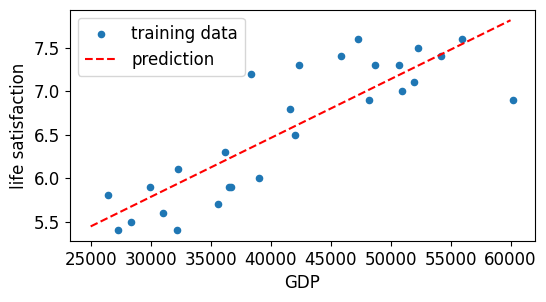

In [5]:
# plot the prediction model f

def f(X, theta):
    return np.matmul(X, theta)

plt.rcParams.update({'font.size': 12, "figure.figsize": (6,3)})
plt.scatter(X, y, s=20, label='training data')

X_test = np.array([25000, 60000])
y_test = f(add_column(X_test), theta)
plt.plot(X_test, y_test, 'r--', label='prediction')

plt.legend()
plt.xlabel('GDP')
plt.ylabel('life satisfaction')
plt.show()


### Linear models for regression
<hr style="border:2px solid gray">

* Given the training data set $\mathcal{D}=\{(\mathbf{x}_n,y_n)\}_{n=1}^N$ and an input vector $\mathbf{x}\in\mathbb{R}^D$, the linear regression model takes the form

$$f(\mathbf{x})=\theta_0+\theta_1x_1+\theta_2x_2+\ldots+\theta_Dx_D=\theta_0+\boldsymbol{\theta}^T\mathbf{x}$$
    
* $\boldsymbol{\theta}\in\mathbb{R}^D$: weights or regression coefficients, $\theta_0$: intercept or bias term

* Compact representation by defining $\mathbf{x}=[\color{red}{x_0=1},x_1,\ldots,x_D]$ and $\boldsymbol{\theta}=[\theta_0,\theta_1,\ldots,\theta_D]$ in $\mathbb{R}^{D+1}$

$$f(\mathbf{x})=\boldsymbol{\theta}^T\mathbf{x}=\langle \boldsymbol{\theta}, \mathbf{x}\rangle$$

### Loss function for linear regression
<hr style="border:2px solid gray">

* MSE loss function for a linear regression model

$$\mathcal{L}(\boldsymbol{\theta})=\frac{1}{N}\sum_{n=1}^N\big(y_n-\langle \boldsymbol{\theta},\mathbf{x}_n\rangle\big)^2=\frac{1}{N}\|\mathbf{y}-\mathbf{X}\boldsymbol{\theta}\|_2^2$$

where we have (each row of $\mathbf{X}$ is an observation  and each column is a feature)

$$\mathbf{X}=\begin{bmatrix}\rule[.5ex]{1em}{0.4pt}\mathbf{x}_1^T \rule[.5ex]{1em}{0.4pt}\\ \vdots\\\rule[.5ex]{1em}{0.4pt}\mathbf{x}_N^T \rule[.5ex]{1em}{0.4pt}\end{bmatrix}\in\mathbb{R}^{N\times (D+1)}, \boldsymbol{\theta}=\begin{bmatrix}
\theta_0\\\theta_1\\ \vdots \\\theta_{D}\end{bmatrix}\in\mathbb{R}^{D+1},\;\mathbf{y}=\begin{bmatrix}y_1\\y_2\\ \vdots\\y_N\end{bmatrix}\in\mathbb{R}^N, $$


* Optimization problem for model fitting/training: $\underset{\boldsymbol{\theta}\in\mathbb{R}^{D+1}}{\operatorname{argmin}} \mathcal{L}(\boldsymbol{\theta})$




### The Normal equation
<hr style="border:2px solid gray">

* To find the value of $\boldsymbol{\theta}$ that minimizes the MSE, there exists a *closed-form* solution
    * a mathematical equation that gives the result directly
    
* The gradient takes the form 

$$\nabla \mathcal{L}(\boldsymbol{\theta})= \frac{2}{N}\mathbf{X}^T\big(\mathbf{X}\boldsymbol{\theta} - \mathbf{y}\big)$$

* Normal equation

$$\boldsymbol{\theta}^*=\big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T\mathbf{y}$$

### Sklearn implementation
<hr style="border:2px solid gray">

* Documentation page: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

    * Parameters: Useful for creating objects 
    
    * Attributes: Estimated coefficients, etc.
    
    * Methods: Training, prediction, etc.
    
* Linear Regression's `fit` method
    * $\mathbf{X}$ of shape `(n_samples, n_features)` specifies the expected dimensions of $\mathbf{X}$:
        * `n_samples` is the number of individual data points (or observations) in the dataset.
        * `n_features` is the number of features (or variables) that describe each data point. Each feature corresponds to a column in X.
    * $\mathbf{y}$ represents the target values or labels associated with the input data $\mathbf{X}$, which the model will learn to predict.
    * The shape `(n_samples,)` implies that $\mathbf{y}$ should have the same number of elements as there are samples in $\mathbf{X}$, suitable for single-output models.

In [6]:
print(X.shape, y.shape)



(27,) (27,)


In [7]:
# Revisit the GDP data 

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X.reshape(-1,1), y) # X should be a 2D array 

print(reg.intercept_, reg.coef_)



3.7490494273769075 [6.77889969e-05]


In [8]:
# Revisit the GDP data by preprocessing input features 

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X_minmax = minmax.fit_transform(X.reshape(-1,1))

reg = LinearRegression()

reg.fit(X_minmax, y) # X should be a 2D array 

print(reg.intercept_, reg.coef_)



5.542501428448674 [2.28986761]


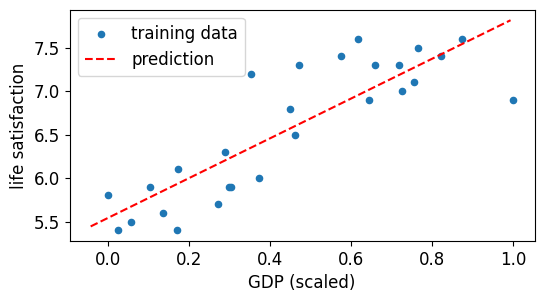

In [9]:
# Plot the prediction model 

plt.rcParams.update({'font.size': 12, "figure.figsize": (6,3)})
plt.scatter(X_minmax, y, s=20, label='training data')

X_test = np.array([25000, 60000]).reshape(-1,1)
X_test_minmax = minmax.transform(X_test)
plt.plot(X_test_minmax, reg.predict(X_test_minmax), 'r--', label='prediction')

plt.legend()
plt.xlabel('GDP (scaled)')
plt.ylabel('life satisfaction')
plt.show()



### Evaluation metrics for regression problems
<hr style="border:2px solid gray">

* The quality of a regression model can be assessed using various quantities
    * See https://scikit-learn.org/stable/modules/model_evaluation.html

* Mean squared error 
$$\text{MSE}(\mathbf{y}, \hat{\mathbf{y}})=\frac{1}{N_{\text{test}}}\sum_{n=1}^{N_{\text{test}}} \big(y_n - \hat{y}_n\big)^2$$

* The value you get after calculating MSE is a squared unit of output
    
* If you have outliers in the data set, then it penalizes the outliers most 
    
* Possible solution: the output value you get is in the same unit as the required output variable

$$\text{RMSE}(\mathbf{y}, \hat{\mathbf{y}})=\sqrt{\frac{1}{N_{\text{test}}}\sum_{n=1}^{N_{\text{test}}} \big(y_n - \hat{y}_n\big)^2}$$

In [10]:
from sklearn.metrics import mean_squared_error

y_true = [3, -1, 2, 7]
y_pred = [3, 0, 2, 7]

# If True returns MSE value, if False returns RMSE value.
print('MSE: ', mean_squared_error(y_true, y_pred), 
      ', RMSE: ', mean_squared_error(y_true, y_pred, squared=False))


MSE:  0.25 , RMSE:  0.5


### R² score or the coefficient of determination
<hr style="border:2px solid gray">

* Definition 

$$R^2(\mathbf{y}, \hat{\mathbf{y}}) = 1 - \frac{\sum_{n=1}^{N_{\text{test}}} (y_n - \hat{y}_n)^2}{\sum_{n=1}^{N_{\text{test}}} (y_n - \bar{y})^2},\;\;\bar{y} = \frac{1}{N_{\text{test}}} \sum_{n=1}^{N_{\text{test}}} y_n$$

* RSS (Residual Sum of Squares) measures the amount of variability that is left unexplained 

$$\text{RSS}=\sum_{n=1}^{N_{\text{test}}} (y_n - \hat{y}_n)^2$$

* Best possible score is 1 and a number near 0 indicates the model does not explain much of the variability in the response

In [11]:
from sklearn.metrics import r2_score

y_true = [3, -1, 2, 7]
y_pred = [2.9, 0, 2.5, 6.5]

print(r2_score(y_true, y_pred))


0.9538931297709924


### Polynomial regression 
<hr style="border:2px solid gray">

* The linear model may not be a good fit for many problems 
    * We can improve the fit by using a polynomial regression model of degree $d$

$$f(x)=\boldsymbol{\theta}^T\phi(x)$$

where $\phi(x)=[1,x,x^2,\ldots,x^d]$

* This is a simple example of feature preprocessing/engineering
    * Benefit: linear function of parameters but nonlinear wrt input features

* We can use [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to generate polynomial features
    * Use pipeline in sklearn to assemble several steps (preprocessing + estimator)


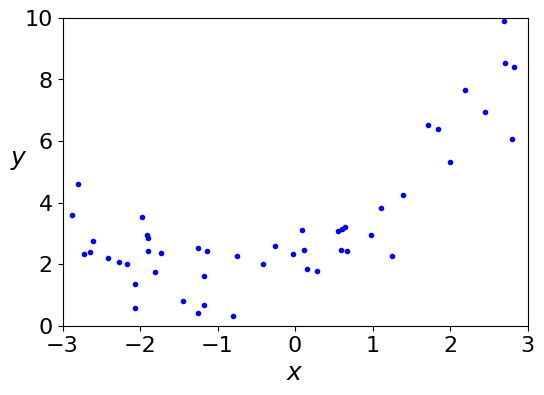

In [12]:
# generate simulated data 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
plt.rcParams.update({'font.size': 16, "figure.figsize": (6,4)})

N = 50
X = 6 * np.random.rand(N, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(N, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


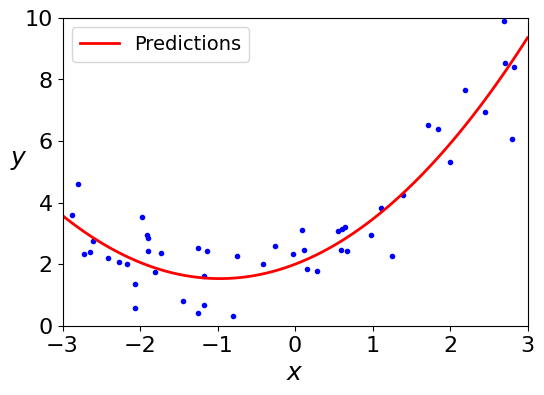

In [13]:
# train polynomial model 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regr', LinearRegression())])

pipe.fit(X, y) # training 
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_new = pipe.predict(X_new) # prediction

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()


### Main concepts in Pipelines
<hr style="border:2px solid gray">

* Transformer: filtering or modifying the data
    * Classes that implement both fit() and transform() 
    * Example: generate a new data matrix consisting of all polynomial combinations 
* Estimator: learning from data 
    * Classes that implement both fit() and predict()
    * Example: train a linear regression model on the input features 
    
* Thus, Pipelines allow us to sequentially apply a list of transformers and a final estimator 

<img src="https://raw.githubusercontent.com/farhad-pourkamali/ProgrammingForDataScience/main/images/pipeline.png" width=700>

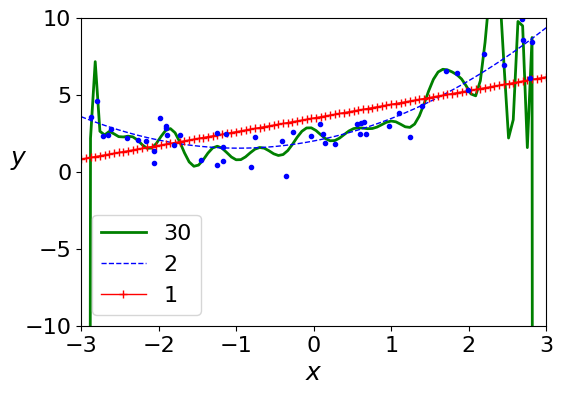

In [14]:
# Compare varying complexity levels 
from sklearn.preprocessing import StandardScaler

for style, width, degree in (("g-", 2, 30), ("b--", 1, 2), ("r-+", 1, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([("poly_features", polybig_features),
                                      ("std_scaler", std_scaler),
                                      ("lin_reg", lin_reg)])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, -10, 10])
plt.show()


* **Underfitting** occurs when the model is too simple to capture the underlying structure of the data. 
    * In the context of polynomial regression, this often happens when the degree of the polynomial is too low. For example, using a linear model (a 1st-degree polynomial) for data that has a complex, nonlinear relationship will likely result in underfitting. 

* **Overfitting** happens when the model is too complex and starts to capture not just the underlying trend in the data, but also the noise present in the training dataset. 
    * In polynomial regression, overfitting is common when using a polynomial degree that is too high. A high-degree polynomial model can fit the training data very closely, passing through most of the training points, including the noise. 
    * While this model might perform exceptionally well on the training data, its complex nature makes it poorly generalize to new, unseen data.

### HW 13

1. In this assignment, we use the `diabetes` dataset from the `sklearn.datasets` module to build and evaluate a linear regression model. The diabetes dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) consists of 10 physiological variables (age, gender, body mass index, average blood pressure, and six blood serum measurements) measured on 442 patients, and an indication of disease progression after one year.

Load the dataset and split it into features and the target variable. The target variable is a quantitative measure of disease progression one year after baseline. Also, split the dataset into a training set and a testing set using `train_test_split` from `sklearn.model_selection`.

Import the `LinearRegression` model from `sklearn.linear_model`.
Initialize the Linear Regression model and fit it to your training data.

Evaluate the performance of your model using the following metrics:

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* R-squared Score

2. In this assignment, we explore the `mtcars` dataset, which is provided to you as a CSV file. 

The first step is to import this dataset. Split the data into train and test sets and print the size of each part. We keep two input features `hp` (horse power) and `wt` (weight), and the target is `mpg` (mile per gallon). 

Use sklearn to fit the training data using linear regression in three cases: (1) input: horse power only, (2) input: weight only, and (3) inputs: horse power and weight. Evaluate the performance of each regression model using the three evaluation metrics discussed in Problem 1.

3. In this assignment, you explore the California housing dataset from the `sklearn.datasets` module by applying polynomial regression techniques. The aim is to investigate the effectiveness of polynomial features in modeling the nonlinear relationships between the features and the target variable, which is the average house value in units of 100,000.

Load the California housing dataset from `sklearn.datasets` (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing). Familiarize yourself with the dataset, understanding its structure, features, and target variable. 

Divide the dataset into a training set and a testing set, adhering to a common split ratio such as 70% for training and 30% for testing. Employ `PolynomialFeatures` from `sklearn.preprocessing` and experiment with various polynomial degrees (e.g., 2, 3, 4) to evaluate their impact on the model.

Construct a linear regression model utilizing the polynomially transformed features.
Train this model with the training data. Use your trained model to make predictions on the test set. Assess the model's performance using metrics such as the Mean Squared Error (MSE) and the R-squared Score. For a comprehensive analysis, compare these results with those from a simple linear regression model (without polynomial features).